In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
plt.rcParams['figure.dpi'] = 70
import timeit
import random as rand

### Fenton and Eason’s Function

$$ f(x) = \left[12 + x_1^2 + \frac{1+x_2^2}{x_1^2} + \frac{x_1^2x_2^2+100}{(x_1x_2)^4}\right]\left(\frac{1}{10}\right) $$

In [2]:
def FaE(x1, x2):
    arg1 = x1**2
    arg2 = (1+(x2**2))/(x1**2)
    arg3 = ((x1**2 * x2**2)+100)/((x1*x2)**4)
    y = (12 + arg1 + arg2 + arg3)/10
    return y

### Contour Plot of Fenton and Eason’s Function

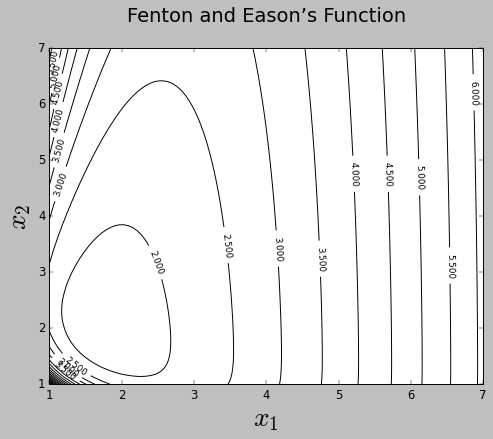

In [3]:
x1 = np.linspace(1, 7, 100) # x1 domain
x1 = x1[x1 != 0] # Remove any zero value to avoid div by zero error
x2 = np.linspace(1, 7, 100) # x2 domain
x2 = x2[x2 != 0] # Remove any zero value to avoid div by zero error
X1, X2 = np.meshgrid(x1, x2) # mesh to make contour plot
Y = FaE(X1, X2) # call Fenton and Eason's Function helper function I defined above

# print(X1, X2, Y)

fig, ax = plt.subplots()
# Plot contour plot of Fenton and Eason's Function
CS = ax.contour(X1, X2, Y, 20,
                 colors='k',  # negative contours will be dashed by default
                 )
ax.clabel(CS, fontsize=9, inline=1) # Contour labels
ax.set_xlabel('$x_1$', fontsize=28) 
ax.set_ylabel('$x_2$', fontsize=28) 
ax.set_title('Fenton and Eason’s Function\n', fontsize=20) 
plt.show()

In [4]:

# Helper function for sorting vertices according to their values
def orderThem(x):
#     print(x)
    y = [FaE(x[0,0],x[0,1]), # Evaluate at 1st vertex
         FaE(x[1,0],x[1,1]), # Evaluate at 2nd vertex 
         FaE(x[2,0],x[2,1])] # Evaluate at 3rd vertex 
#     print(y)
    sortIndxs = np.argsort(y) # Returns indices of sorted values
    # Sort values
    ySorted = [y[sortIndxs[0]],
               y[sortIndxs[1]], 
               y[sortIndxs[2]]]
#     print(ySorted)
    # Sort vertices
    xSorted = np.array([x[sortIndxs[0],:],
                        x[sortIndxs[1],:],
                        x[sortIndxs[2],:]])
#     print(xSorted)
    # Calculate centroid of vertices
    centroid = [0, 0]
    centroid[0] = (xSorted[0,0]+xSorted[1,0]+xSorted[2,0])/3
    centroid[1] = (xSorted[0,1]+xSorted[1,1]+xSorted[2,1])/3
    return ySorted, xSorted, centroid
 
    
    
    
# Starting points (vertices)
def GeometricSimplex(xo, e) :
#     xo = np.array([[2,2],
#                    [4,4],
#                    [4,2]])
    i = 1 # Iteration counter 
#     e = 0.01 # Stopping condition 
    optimumNotFound = True # Used to terminate while program
    x1data = [] # Data storage
    x2data = [] # Data storage
    c1data = [] # Data storage
    c2data = [] # Data storage
    yo, xo, co = orderThem(xo) # Orders vertices according to their values
    originalx1 = np.array(xo[:,0])
    originalx2 = np.array(xo[:,1])
    originalc = co
    start = timeit.default_timer() # Start runtimer
    while optimumNotFound :
        yo, xo, co = orderThem(xo) # Orders vertices according to their values
        xr = co + (co - xo[2,:]) # Compute reflected point
        yr = FaE(xr[0],xr[1])
        # If the reflected point is better than the second worst, but not better than the best
        # then obtain a new simplex by replacing the worst point with the reflected point
        if yo[0] <= yr < yo[1] : 
            xo = np.array([xo[0,:], xo[1,:], xr])
        # If the reflected point is the best point so far
        # then compute the expanded point
        if yr < yo[0] :
            xe = co + (2*(xr - co))
            ye = FaE(xe[0],xe[1])
            # If the expanded point is better than the reflected point
            # then obtain a new simplex by replacing the worst point with the expanded point
            if ye < yr :
                xo = np.array([xo[0,:], xo[1,:], xe])
            # else obtain a new simplex by replacing the worst point with the reflected point
            else: 
                xo = np.array([xo[0,:], xo[1,:], xr])
        # If the reflected point is worse than the second worst
        # then compute the contracted point
        if yr >= yo[1] :
            xc = co + (0.5*(xo[2] - co))
            yc = FaE(xc[0],xc[1])
            # If the contracted point is better than the worst point
            # then obtain a new simplex by replacing the worst point with the contracted point
            if yc < yo[2] :
                xo = np.array([xo[0,:], xo[1,:], xc])
        # Shrink 
        # Replace all points except the best
        # try without for now - built to handle failures 
        # Test Convergence 
        yn, xn, cn = orderThem(xo)
        Q = ((((yn[0]-yo[0])**2) + ((yn[1]-yo[1])**2) + ((yn[2]-yo[2])**2))/4)**(1/2)
    #     x1data = np.append(x1data, xn[:,0])
    #     x2data = np.append(x2data, xn[:,1])
        c1data = np.append(c1data, cn[0])
        c2data = np.append(c2data, cn[1])
        if Q < e:
            optimumNotFound = False
            print("Program done running.")
            stop = timeit.default_timer() # Stop runtimer
            print("Runtime: " + str(round(stop - start,4)) + " seconds") 
            print('Optimum = ' + str(round(yn[0],3)))
            print('Iterations = ' + str(i))
        i = i+1

    fig, ax = plt.subplots()
    CS = ax.contour(X1, X2, Y, 20,
                    colors='k',  # negative contours will be dashed by default
                    )
    ax.clabel(CS, fontsize=9, inline=1) # Contour labels
    ax.set_xlabel('$x_1$', fontsize=28) 
    ax.set_ylabel('$x_2$', fontsize=28) 
    ax.plot(c1data, c2data, 'o')
    ax.plot(originalx1, originalx2, 'ro')
    ax.plot(originalc[0], originalc[1], 'bo')
    plt.show()

Program done running.
Runtime: 0.0021 seconds
Optimum = 1.745
Iterations = 11


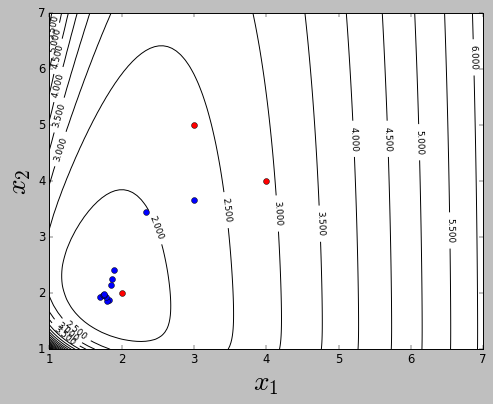

In [5]:
xo = np.array([[2,2],
               [4,4],
               [3,5]])
e = 0.001
GeometricSimplex(xo, e)

Program done running.
Runtime: 0.0017 seconds
Optimum = 1.745
Iterations = 9


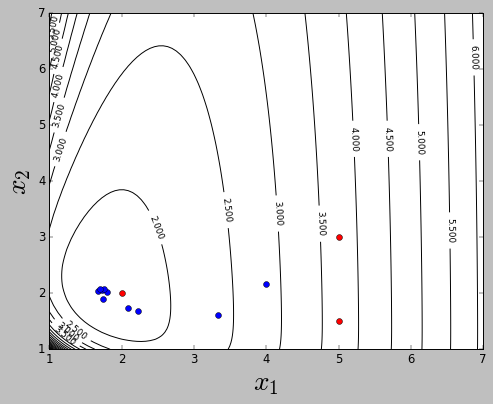

In [6]:
xo = np.array([[2,2],
               [5,1.5],
               [5,3]])
e = 0.001
GeometricSimplex(xo, e)

Program done running.
Runtime: 0.0033 seconds
Optimum = 1.865
Iterations = 23


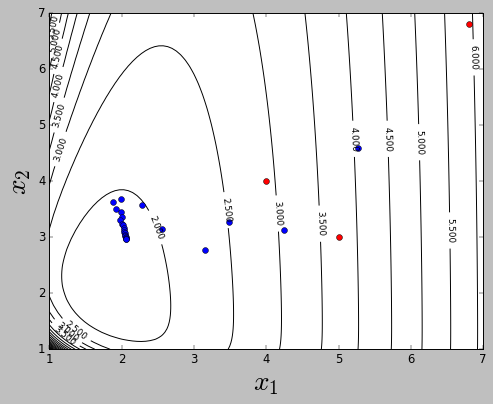

In [7]:
xo = np.array([[5,3],
               [4,4],
               [6.8,6.8]])
e = 0.001
GeometricSimplex(xo, e)